In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
sns.set(style="whitegrid", palette="pastel", color_codes=True)

In [2]:
results_df = pd.read_csv('MU check data RC 12-4-2017.csv')

## Load in results from audit of times to perform a single activity

In [3]:
results_df[['Site', 'By', 'Using', 'MU_check_mins']].head()

,Site,By,Using,MU_check_mins
0,RT MANDIBLE,RJ,IMSure,6
1,T-L SPINE,VLEE,IMSure,9
2,RECTUM,RJ,IMSure,19
3,BLADDER,VLEE,IMSure,8
4,RECTOSIGMOID,RJ,IMSure,21


In [4]:
results_df.shape[0]  # 77 patients

77

In [5]:
sites = results_df['Site'].value_counts()
print(len(sites))
sites

28


RT BREAST        13
RECTUM           10
LT BREAST         9
ENDOMETRIUM       8
BLADDER           5
PANCREAS          3
LT CHEST          3
LARYNX            3
RT EAR            2
OESOPHAGUS        2
ANUS              2
LT BRAIN.         1
PHARYNX RETRT     1
RECTUM REC.       1
PRONE RECTUM.     1
T-L SPINE         1
RA CHEST          1
RT MANDIBLE       1
LT FACE           1
LT SCF_AX         1
LT NECK           1
RT CHEST WALL     1
LT BUTTOCK        1
LT CW WAX         1
RECTOSIGMOID      1
LT AXILLA         1
POST RIB          1
RT CHEST          1
Name: Site, dtype: int64

In [6]:
mult_sites = sites[sites > 1].index.values   # get the sites with more than 1 entry
print(len(mult_sites))
mult_sites

11


array(['RT BREAST', 'RECTUM', 'LT BREAST', 'ENDOMETRIUM', 'BLADDER',
       'PANCREAS', 'LT CHEST', 'LARYNX', 'RT EAR', 'OESOPHAGUS', 'ANUS'], dtype=object)

In [7]:
mult_sites_df = results_df[results_df['Site'].isin(mult_sites)]       # for plots of sites with more than 1 entry
notin_mult_sites_df = results_df[~results_df['Site'].isin(mult_sites)]

## Plot constituents of audit grouped by structure and test method for only cases with more than 1 entry

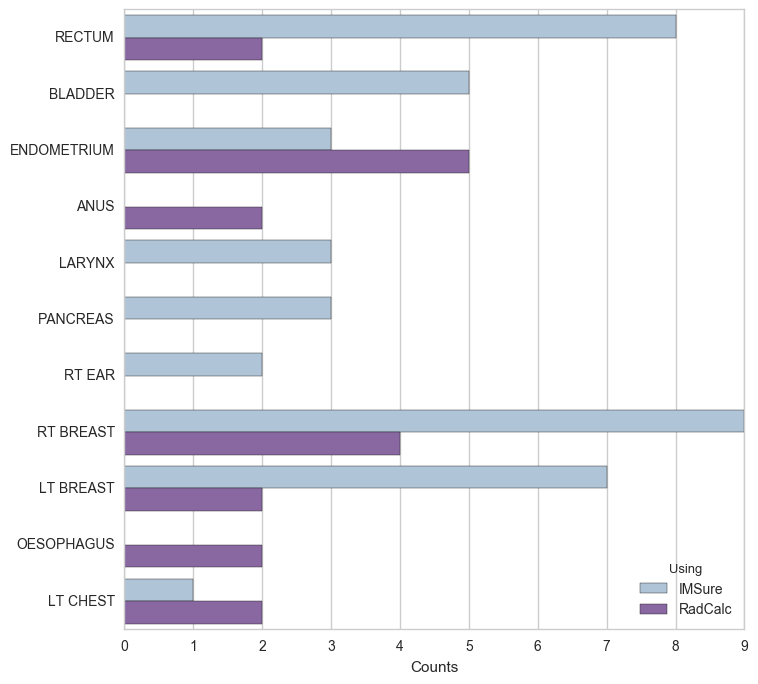

In [8]:
plt.figure(figsize=(8, 8))  
sns.countplot(y="Site", hue="Using", data=mult_sites_df, palette="BuPu");  # , palette="Greens_d", , order=reversed(sites.index.values)
plt.ylabel(' ');
plt.xlabel('Counts');

In [9]:
print(len(results_df['Using']))
results_df['Using'].value_counts()

77


IMSure     51
RadCalc    26
Name: Using, dtype: int64

In [10]:
results_df['By'].value_counts()

RJ      31
DM      16
MT       9
VLEE     9
MB       7
IV       2
RH       1
KL       1
ML       1
Name: By, dtype: int64

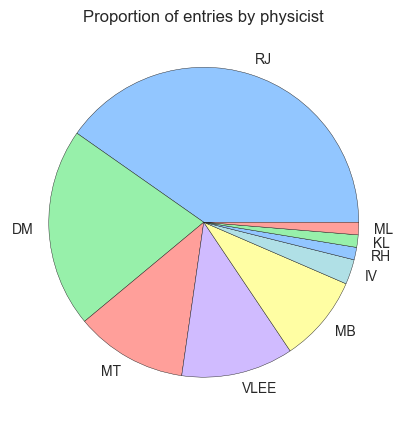

In [11]:
#plt.figure(figsize=(3, 3)) 
results_df['By'].value_counts().plot.pie(figsize=(5, 5), title = 'Proportion of entries by physicist');
plt.ylabel(' ');

## Various histograms of the time to perform test, also filtered by number of entries per region

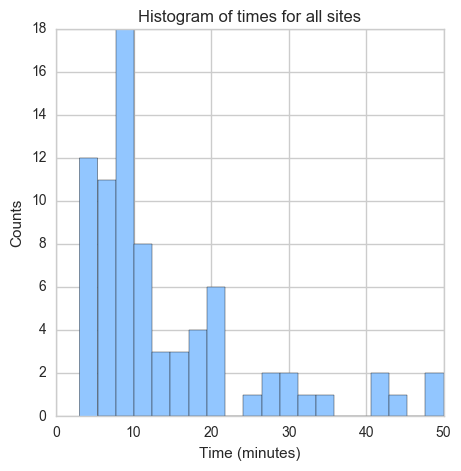

In [12]:
results_df['MU_check_mins'].plot.hist(figsize=(5, 5), bins=20);   # all results
#mult_sites_df['MU_check_mins'].plot.hist(figsize=(5, 5), bins=20);   # all results
#notin_mult_sites_df['MU_check_mins'].plot.hist(figsize=(5, 5), bins=20);   # all results
plt.title('Histogram of times for all sites');
plt.xlim([0, 50])
plt.xlabel('Time (minutes)');
plt.ylabel('Counts');

## Plot to show the distribution of times by region and test

http://seaborn.pydata.org/generated/seaborn.boxplot.html

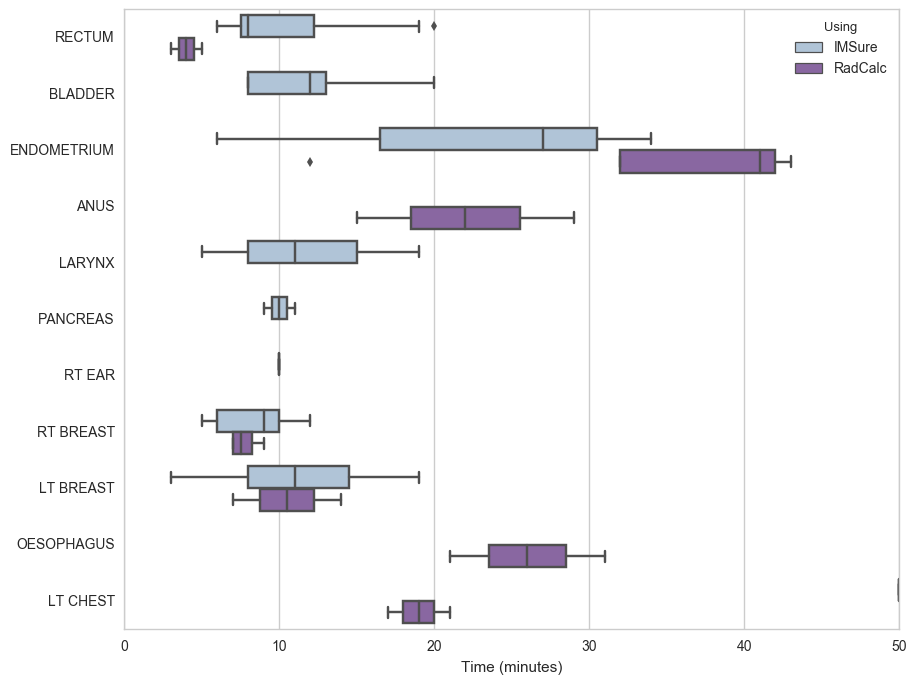

In [13]:
plt.figure(figsize=(10, 8))  
sns.boxplot(x="MU_check_mins", y="Site", data=mult_sites_df, hue="Using",palette="BuPu");  #  hue="By",
plt.xlabel('Time (minutes)');
plt.ylabel(' ');

## Show means by region and physicist

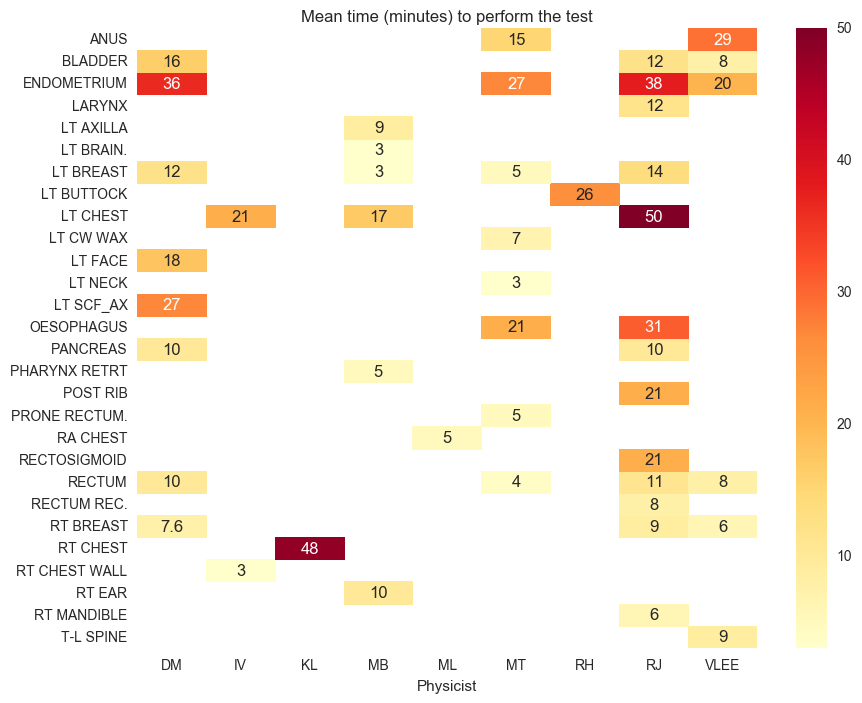

In [14]:
plt.figure(figsize=(10, 8)) 
results_pivot = results_df.groupby(['Site', 'By'],as_index=False).mean().pivot(index='Site', columns='By', values='MU_check_mins')
sns.heatmap(results_pivot, annot=True, cmap='YlOrRd');
plt.title('Mean time (minutes) to perform the test');
plt.ylabel(' ');
plt.xlabel('Physicist');

## Unused

C:\Users\RCole02.ROYALSURREY\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting
  from ipykernel import kernelapp as app


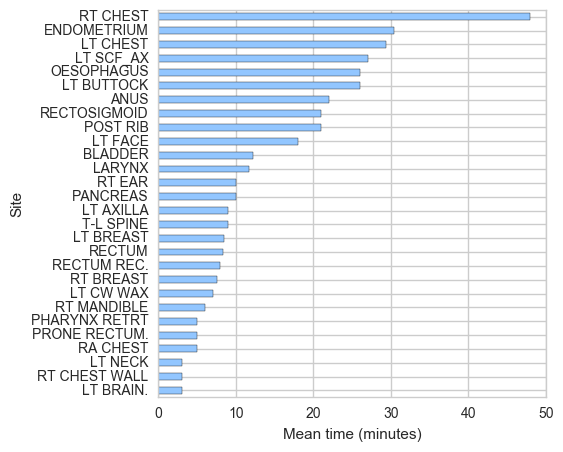

In [15]:
res = results_pivot.mean(axis=1)
res.sort()
res.plot.barh(figsize=(5, 5)); # , labeldistance=2
plt.xlabel('Mean time (minutes)');

C:\Users\RCole02.ROYALSURREY\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


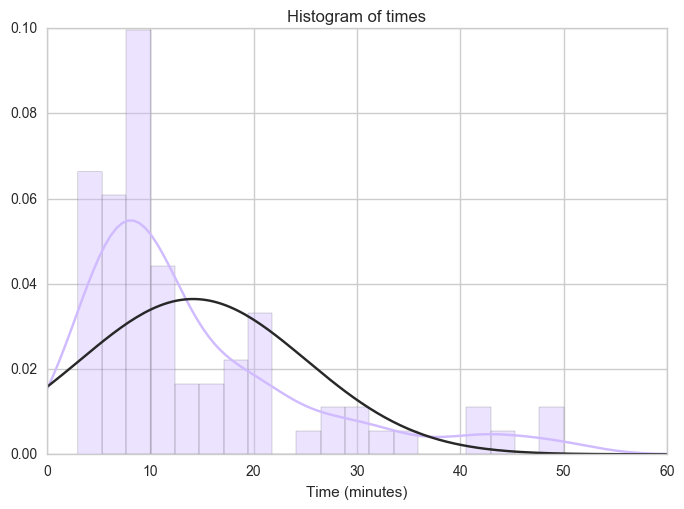

In [16]:
from scipy.stats import norm
sns.distplot(results_df['MU_check_mins'], color="m", bins=20,  fit=norm)  # ,  kde=False
plt.title('Histogram of times')
plt.xlim([0,60])
plt.xlabel('Time (minutes)')